<a href="https://colab.research.google.com/github/khodid/2021MachineLearningIntro/blob/main/MLch3_Preprocessing_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# '평가' 파트 실습

## Kaggle에서 데이터 로드

데이터는 교재에서 안내하는 [피마 인디언 당뇨병 예측](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 데이터셋.

데이터 로드 하는 방법은 [이곳](https://medium.com/hyunjulie/%EC%BA%90%EA%B8%80%EA%B3%BC-%EA%B5%AC%EA%B8%80-colab-%EC%97%B0%EA%B2%B0%ED%95%B4%EC%A3%BC%EA%B8%B0-6a274f6de81d) 을 참고하였음

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [3]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
! kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 3.48MB/s]


In [6]:
!unzip /content/pima-indians-diabetes-database.zip

Archive:  /content/pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


## 데이터 살펴 보기

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.model_selection import train_test_split # 데이터셋 나누는 부분
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score # 평가 지표
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve # 평가 지표
from sklearn.preprocessing import StandardScaler # 전처리 - 스케일링
from sklearn.linear_model import LogisticRegression # 예측 모델

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [18]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


- 대충 봤을 때 **0인 값이 꽤 많아 보인다**. 아마 결손 값이 아닐까 생각함.
피쳐는
- 임신 횟수, 글루코스 수치, 혈압, 피하지방, 인슐린, BMI, 당뇨 내력 가중치, 나이, Outcome.
여기서 OUTCOME을 결정해야 하는 것 같음.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 데이터 전처리 파트

교재에서 배웠던 내용
- 레이블 인코딩, 원 핫 인코딩, 이걸 한 번에 하는 사이킷런의 메서드
- 표준화, 정규화

In [22]:
# 데이터 분리 - 피쳐와 레이블
X = data.iloc[:, :-1] # 마지막 열을 제외한 나머지 열
Y = data.iloc[:, -1] # 마지막 열(Outcome)

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)을 이용해서 학습 데이터와 평가 데이터를 나눔.
- random_state : 설명 보면 대충 랜덤 시드를 전송하는 의미인 것 같음.
- stratified : 분포를 균일하도록 맞춰주는 역할을 하는 것 같음.


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 156, stratify=Y)

## 예측

In [26]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, Y_train)
#pred = lr_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


```
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
```

이라는 내용의 경고가 뜬다. 대충 스케일링이 덜 돼서 힘들다는 얘기라고 이해했습니다.


In [28]:
# Standard scaler 이용. Logistic Regression 이 이에 영향을 많이 받는다고 책에 써있었음.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 156, stratify=Y)

In [31]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, Y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

여러 평가 지표 확인

In [35]:
confusion_matrix(Y_test, pred)

array([[90, 10],
       [21, 33]])

In [37]:
accuracy_score(Y_test, pred)

0.7987012987012987

In [38]:
precision_score(Y_test, pred)

0.7674418604651163

In [39]:
recall_score(Y_test, pred)

0.6111111111111112

아까 확인했을 때 봤 듯이 0 값의 존재 때문에 예측 성능이 떨어진다. 이걸 어떻게 손 봐서 개선하면 좋겠다.

In [41]:
data.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [57]:
ntotal = data['BMI'].count()
for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    cnt = data[data[feature] == 0][feature].count()
    print('{}에 \'0\'은 {}개 있음. 비율로 치면 {:.2f}'.format(feature, cnt, cnt/ntotal))

Glucose에 '0'은 5개 있음. 비율로 치면 0.01
BloodPressure에 '0'은 35개 있음. 비율로 치면 0.05
SkinThickness에 '0'은 227개 있음. 비율로 치면 0.30
Insulin에 '0'은 374개 있음. 비율로 치면 0.49
BMI에 '0'은 11개 있음. 비율로 치면 0.01


In [68]:
# 평균값 대체
print("<교재서 구한 것>")
print(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].mean()) # 교재에서 구한 평균값
print("\n<0값을 제외한 평균>")
for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    dmean = data[data[feature] != 0][feature].mean() # 교재에선 그냥 평균 내는데 내 생각엔 0 값을 제외하고 평균 내야 맞는 것 같음
    print('Feature: {}, mean : {:.4f}'.format(feature, dmean))

<교재서 구한 것>
Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

<0값을 제외한 평균>
Feature: Glucose, mean : 121.6868
Feature: BloodPressure, mean : 72.4052
Feature: SkinThickness, mean : 29.1534
Feature: Insulin, mean : 155.5482
Feature: BMI, mean : 32.4575


In [70]:
for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    dmean = data[data[feature] != 0][feature].mean() # 교재에선 그냥 평균 내는데 내 생각엔 0 값을 제외하고 평균 내야 맞는 것 같음
    data[[feature]] = data[[feature]].replace(0, dmean)

In [71]:
# 진짜 제거 된 것인지 확인

ntotal = data['BMI'].count()
for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    cnt = data[data[feature] == 0][feature].count()
    print('{}에 \'0\'은 {}개 있음. 비율로 치면 {:.2f}'.format(feature, cnt, cnt/ntotal))

Glucose에 '0'은 0개 있음. 비율로 치면 0.00
BloodPressure에 '0'은 0개 있음. 비율로 치면 0.00
SkinThickness에 '0'은 0개 있음. 비율로 치면 0.00
Insulin에 '0'은 0개 있음. 비율로 치면 0.00
BMI에 '0'은 0개 있음. 비율로 치면 0.00


In [72]:
# 0을 제거한 data로 다시 scaling

X = data.iloc[:, :-1] # 마지막 열을 제외한 나머지 열
Y = data.iloc[:, -1] # 마지막 열(Outcome)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 156, stratify=Y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, Y_train)
pred = lr_clf.predict(X_test)

In [81]:
print(confusion_matrix(Y_test, pred))
print('정확도(Accuracy): {:.4f}, 정밀도(Precision): {:.4f}, 재현율(Recall): {:.4f}'.format(accuracy_score(Y_test, pred), precision_score(Y_test, pred), recall_score(Y_test, pred)))
print(f1_score(Y_test, pred))

[[89 11]
 [21 33]]
정확도(Accuracy): 0.7922, 정밀도(Precision): 0.7500, 재현율(Recall): 0.6111
0.6734693877551021


이상하게도... 아까보다 성능 아주 약간 떨어졌다 ;
TrueNegative 하나가 FalsePositive로 넘어간 듯

```python
# 0값 빼기 이전의 결과
array([[90, 10],
       [21, 33]])
```

이런 부분은 사실 데이터 셋을 어떻게 나눴느냐에 따라서도 달라질 수 있다고 생각한다

## Threshold 값 조정

In [86]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1] # 1열만 취하는 이유는 0열과 1열을 합하면 1이기 때문
roc_score = roc_auc_score(Y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8500


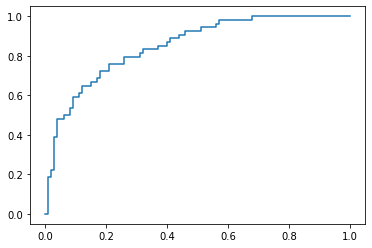

In [89]:
fpr, tpr, thresholds = roc_curve(Y_test, pred_proba)
plt.plot(fpr, tpr, label = 'ROC')

In [92]:
# 다른 Threshold 값을 이용한 예측
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.48)
pred_th_48 = binarizer.fit_transform(pred_proba.reshape(-1, 1))
print(confusion_matrix(Y_test, pred_th_48))
print('정확도(Accuracy): {:.4f}, 정밀도(Precision): {:.4f}, 재현율(Recall): {:.4f}'.format(accuracy_score(Y_test, pred_th_48), precision_score(Y_test, pred_th_48), recall_score(Y_test, pred_th_48)))
print(f1_score(Y_test, pred_th_48))

[[88 12]
 [20 34]]
정확도(Accuracy): 0.7922, 정밀도(Precision): 0.7391, 재현율(Recall): 0.6296
0.68


# 피마 데이터로는 인덱싱 연습은 안 돼서

In [119]:
from sklearn.datasets import load_boston
bc = load_boston()

In [120]:
bc_df = pd.DataFrame(data = bc.data, columns= bc.feature_names)
bc_df['label'] = bc.target

In [121]:
bc_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 라벨 인코딩

In [123]:
from sklearn.preprocessing import LabelEncoder
items = ['TV', '냉장고', '냉장고', '전자레인지', ' 선풍기', '선풍기', '믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

[1 2 2 5 0 4 3]


In [124]:
encoder.classes_

array([' 선풍기', 'TV', '냉장고', '믹서', '선풍기', '전자레인지'], dtype='<U5')

In [125]:
encoder.inverse_transform([2, 3, 1, 5, 2, 2])

array(['냉장고', '믹서', 'TV', '전자레인지', '냉장고', '냉장고'], dtype='<U5')

## 원 핫 인코딩

In [126]:
from sklearn.preprocessing import OneHotEncoder
labels = labels.reshape(-1, 1)
onehot = OneHotEncoder()
onehot.fit(labels)
onehot_labels = onehot.transform(labels)

In [127]:
print(onehot_labels.toarray())

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [128]:
print(onehot_labels.shape)

(7, 6)


In [129]:
df = pd.DataFrame({'item':items})
pd.get_dummies(df)

,item_ 선풍기,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,0,0,0,0,1,0
6,0,0,0,1,0,0
